In [165]:
import warnings
warnings.filterwarnings('ignore')

In [166]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [167]:
data = pd.read_csv('C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/data/processed/Data-final.csv')

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      9840 non-null   float64
 1   longitude                     9840 non-null   float64
 2   temperature_celsius           9840 non-null   float64
 3   condition_text                9840 non-null   float64
 4   wind_mph                      9840 non-null   float64
 5   wind_degree                   9840 non-null   int64  
 6   wind_direction                9840 non-null   float64
 7   pressure_mb                   9840 non-null   float64
 8   pressure_in                   9840 non-null   float64
 9   precip_mm                     9840 non-null   float64
 10  precip_in                     9840 non-null   float64
 11  humidity                      9840 non-null   int64  
 12  cloud                         9840 non-null   int64  
 13  fee

In [169]:
data = data[['latitude' , 'longitude' ,'temperature_celsius' , 'feels_like_celsius' , 'pressure_mb' , 'humidity' ,  'wind_mph' , 'wind_degree' , 'cloud']]

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             9840 non-null   float64
 1   longitude            9840 non-null   float64
 2   temperature_celsius  9840 non-null   float64
 3   feels_like_celsius   9840 non-null   float64
 4   pressure_mb          9840 non-null   float64
 5   humidity             9840 non-null   int64  
 6   wind_mph             9840 non-null   float64
 7   wind_degree          9840 non-null   int64  
 8   cloud                9840 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 692.0 KB


In [171]:
conversion_factor = 273.15
data['temperature_celsius'] = data['temperature_celsius'].add(conversion_factor)
data['feels_like_celsius'] = data['feels_like_celsius'].add(conversion_factor)

In [172]:
new_column_name = 'temperature_kelvin'
data = data.rename(columns={'temperature_celsius': new_column_name})

In [173]:
new_column_name = 'feels_like_kelvin'
data = data.rename(columns={'feels_like_celsius': new_column_name})

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9840 non-null   float64
 1   longitude           9840 non-null   float64
 2   temperature_kelvin  9840 non-null   float64
 3   feels_like_kelvin   9840 non-null   float64
 4   pressure_mb         9840 non-null   float64
 5   humidity            9840 non-null   int64  
 6   wind_mph            9840 non-null   float64
 7   wind_degree         9840 non-null   int64  
 8   cloud               9840 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 692.0 KB


In [175]:
data.head()

,latitude,longitude,temperature_kelvin,feels_like_kelvin,pressure_mb,humidity,wind_mph,wind_degree,cloud
0,24.57,77.72,300.65,302.85,1008.0,67,12.8,281,26
1,23.33,77.80,300.65,303.15,1008.0,70,9.6,287,19
2,22.07,78.93,299.45,301.35,1009.0,70,11.4,317,51
3,21.86,77.93,298.75,300.75,1009.0,76,10.5,297,65
4,22.75,77.72,300.35,303.05,1009.0,74,10.1,274,82


In [176]:
X = data.drop(['cloud'],axis=1)
y = data['cloud']

In [177]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [178]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [179]:
reg = RandomForestRegressor(max_depth=8)
reg.fit(X_train , y_train)
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print(f"Root mean squared error of the model : {rmse} ")
r2 = r2_score(y_test , y_pred)
print(f"R2 score of the model : {r2} ")

Root mean squared error of the model : 19.710061913283973 
R2 score of the model : 0.6181507586319519 


In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor

In [181]:
from sklearn.ensemble import StackingRegressor

stacking_reg = StackingRegressor(
    estimators = [
        ('Extra Trees ',ExtraTreesRegressor(max_depth=8)),
        ('Random Forest ',RandomForestRegressor(max_depth=8)),
        ('Linear Regression', LinearRegression())
    ],
    final_estimator = ExtraTreesRegressor(max_depth=8) , cv = 5
)
stacking_reg.fit(X_train , y_train)
y_pred = stacking_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print(f"Root mean squared error of the model : {rmse} ")
r2 = r2_score(y_test , y_pred)
print(f"R2 score of the model : {r2} ")

Root mean squared error of the model : 19.632182622257652 
R2 score of the model : 0.6211623571715161 


In [182]:
stacking_reg

StackingRegressor(cv=5,
                  estimators=[('Extra Trees ',
                               ExtraTreesRegressor(max_depth=8)),
                              ('Random Forest ',
                               RandomForestRegressor(max_depth=8)),
                              ('Linear Regression', LinearRegression())],
                  final_estimator=ExtraTreesRegressor(max_depth=8))

In [183]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X , y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [184]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu" , kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])

In [185]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
173/173 [==============================] - 2s 3ms/step - loss: 822.2025 - root_mean_squared_error: 28.6741 - val_loss: 526.3055 - val_root_mean_squared_error: 22.9414
Epoch 2/20
173/173 [==============================] - 0s 2ms/step - loss: 484.3081 - root_mean_squared_error: 22.0070 - val_loss: 492.3052 - val_root_mean_squared_error: 22.1880
Epoch 3/20
173/173 [==============================] - 0s 2ms/step - loss: 460.6635 - root_mean_squared_error: 21.4631 - val_loss: 486.5498 - val_root_mean_squared_error: 22.0579
Epoch 4/20
173/173 [==============================] - 0s 2ms/step - loss: 444.3642 - root_mean_squared_error: 21.0799 - val_loss: 471.0850 - val_root_mean_squared_error: 21.7045
Epoch 5/20
173/173 [==============================] - 0s 2ms/step - loss: 432.2278 - root_mean_squared_error: 20.7901 - val_loss: 465.9135 - val_root_mean_squared_error: 21.5850
Epoch 6/20
173/173 [==============================] - 0s 2ms/step - loss: 420.9677 - root_mean_squared_error: 

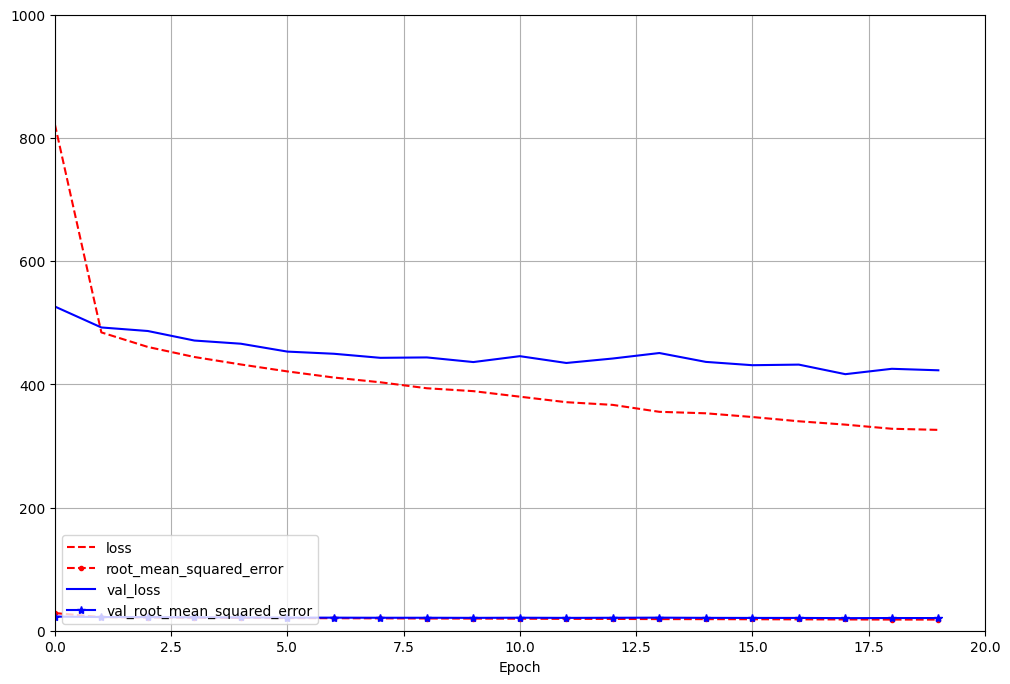

In [186]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(12, 8), xlim=[0, 20], ylim=[0, 1000], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [187]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu',
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu',
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])

In [188]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [189]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
173/173 [==============================] - 4s 7ms/step - loss: 2742.4409 - root_mean_squared_error: 52.3683 - val_loss: 4944.3193 - val_root_mean_squared_error: 70.3159
Epoch 2/50
173/173 [==============================] - 1s 5ms/step - loss: 2065.1914 - root_mean_squared_error: 45.4444 - val_loss: 1305.7594 - val_root_mean_squared_error: 36.1353
Epoch 3/50
173/173 [==============================] - 1s 6ms/step - loss: 1313.6490 - root_mean_squared_error: 36.2443 - val_loss: 881.8826 - val_root_mean_squared_error: 29.6965
Epoch 4/50
173/173 [==============================] - 1s 6ms/step - loss: 717.4203 - root_mean_squared_error: 26.7847 - val_loss: 560.3675 - val_root_mean_squared_error: 23.6721
Epoch 5/50
173/173 [==============================] - 1s 6ms/step - loss: 490.2874 - root_mean_squared_error: 22.1424 - val_loss: 456.1594 - val_root_mean_squared_error: 21.3579
Epoch 6/50
173/173 [==============================] - 1s 6ms/step - loss: 450.1478 - root_mean_squared_er

In [190]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               4608      
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1

In [191]:
score = model.evaluate(X_test , y_test)

 1/77 [..............................] - ETA: 1s - loss: 273.9459 - root_mean_squared_error: 16.5513

77/77 [==============================] - 0s 2ms/step - loss: 379.9012 - root_mean_squared_error: 19.4911


In [192]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test , y_pred)

77/77 [==============================] - 0s 1ms/step


In [193]:
print(f"Root mean squared error of the model : {score[1]} ")
print(f"R2 score of the model : {r2} ")

Root mean squared error of the model : 19.491056442260742 
R2 score of the model : 0.624076433432927 


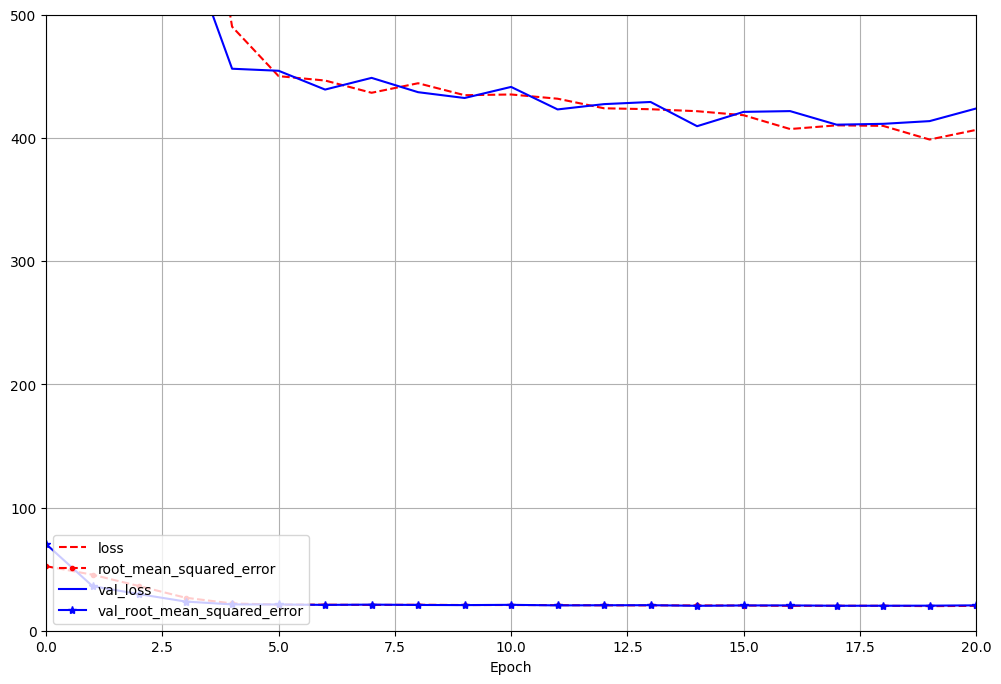

In [194]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(12, 8), xlim=[0, 20], ylim=[0, 500], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [195]:
model.save("C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/models/api_model" , save_format="tf")

INFO:tensorflow:Assets written to: C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/models/api_model\assets


INFO:tensorflow:Assets written to: C:/Users/Aravind/Work/PROJECTS/Cloudburst-Prediction-System/models/api_model\assets
